In [1]:
import geopandas as gpd

In [2]:
import sys
sys.path.append('..')
from nbhd.data import Base

Initializing database connection...
Database connected!


In [3]:
db = Base()

In [4]:
from nbhd.geography import Neighbourhood

In [5]:
n = Neighbourhood()

In [6]:
n.get_data()

Getting data took 0 minutes, 0 seconds.


In [7]:
from nbhd.geometry import cellularize

In [8]:
n.tessellate()

<AxesSubplot:>

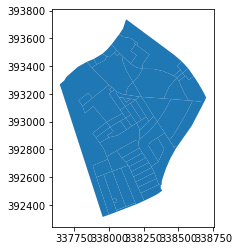

In [9]:
n.tessellation.plot()

In [10]:
n.get_cells()

<AxesSubplot:>

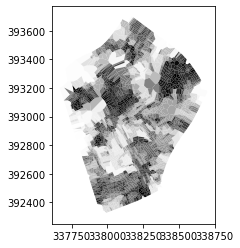

In [12]:
n.cells.plot(cmap='binary')

In [14]:
# cellularize each t-block

In [23]:
r = gpd.sjoin(n.tessellation, n.uprn, op='contains')

cell_dfs = list()
for i in r.index.unique():
    try:
        l = r.loc[r.index==i].UPRN.values
        df =n.uprn.loc[n.uprn.UPRN.isin(l)].geometry
        cell_dfs.append(cellularize(df, r.loc[r.index==i].geometry.unique()[0]))
        cells = pd.concat(cell_dfs)
    except Exception as e:
        print(i, e)

In [20]:
import pandas as pd

<AxesSubplot:>

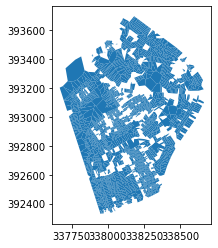

In [24]:
cells.plot()

<GeometryArray>
Length: 83, dtype: geometry

,geometry,index_right,UPRN,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE
0,"POLYGON Z ((338562.000 393068.000 0.000, 33852...",314,38011532,338442.0,392906.0,53.429348,-2.927932
0,"POLYGON Z ((338562.000 393068.000 0.000, 33852...",616,38042178,338435.0,392906.0,53.429347,-2.928037
0,"POLYGON Z ((338562.000 393068.000 0.000, 33852...",618,38042180,338429.0,392915.0,53.429427,-2.928129
0,"POLYGON Z ((338562.000 393068.000 0.000, 33852...",620,38042182,338424.0,392922.0,53.429489,-2.928206
0,"POLYGON Z ((338562.000 393068.000 0.000, 33852...",622,38042184,338419.0,392929.0,53.429552,-2.928282
...,...,...,...,...,...,...,...
0,"POLYGON Z ((338562.000 393068.000 0.000, 33852...",96,38001919,338484.0,393140.0,53.431456,-2.927345
0,"POLYGON Z ((338562.000 393068.000 0.000, 33852...",92,38001915,338470.0,393141.0,53.431463,-2.927556
0,"POLYGON Z ((338562.000 393068.000 0.000, 33852...",188,38004512,338445.0,393126.0,53.431325,-2.927929
0,"POLYGON Z ((338562.000 393068.000 0.000, 33852...",104,38001927,338518.0,393136.0,53.431424,-2.926833


In [29]:
cellularize??

Signature: cellularize(points, polygon)
Source:   
def cellularize(points, polygon):
    'Return Voronoi cells for points in polygon.'

    vor = Voronoi(points) 
    lines = [
        LineString(vor.vertices[line])
        for line in vor.ridge_vertices
    ]

    polys = polygonize(lines)

    cells = [x for p in polys 
                 for x in list(split(p, polygon.boundary)) 
                 if polygon.buffer(1).contains(x)
                ]
    return gpd.GeoDataFrame(geometry=gpd.GeoSeries(cells))
File:      ~/code/nbhd/geometry.py
Type:      function
